<a href="https://colab.research.google.com/github/seeratfatima19/CODSOFT/blob/main/spam_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import TextVectorization


In [38]:
from tensorflow.keras.layers import DenseFeatures

In [8]:
from google.colab import drive

In [9]:
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
data = pd.read_csv('/content/drive/MyDrive/spam.csv', encoding='latin-1')

In [17]:
# helper function to find unique words in the corpus

def find_unique_words():
  s =set()
  for sent in data['text']:
    for word in sent.split():
      s.add(word)
  total_length = len(s)
  return total_length



In [13]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Preprocessing


In [15]:
# drop unnamed columns

data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1,inplace=True)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
# remane the columns v1 and v2
data = data.rename(columns={'v1':'label','v2':'text'})
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
#drop blank rows
data.isnull().sum()
data.dropna(inplace=True)

In [27]:
#find avg number of tokens per sentence
avg_tokens= round(sum([len(i.split()) for i in data['text']])/len(data['text']))
print(avg_tokens)

#now get unique words in the corpus

unique_words = find_unique_words()
print(unique_words)

15
15585


In [29]:
#splitting into training and testing data

X= data['text']
Y= data['label']

#checking success of of process
print(X.shape)
print(Y.shape)

x_train, x_test, y_train, y_test= train_test_split(X,Y,test_size=0.25,random_state=42)


(5572,)
(5572,)


Visual Representations


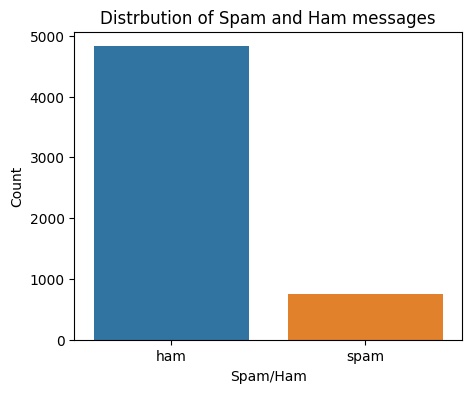

In [20]:
plt.figure(figsize=(5,4))
sns.countplot(x='label',data=data)
plt.title('Distrbution of Spam and Ham messages')
plt.xlabel('Spam/Ham')
plt.ylabel('Count')
plt.show()

Model Building Using Embedding Layers and Vectorization


In [53]:
# using tf-idf vectorization

vectorized = TextVectorization(
    max_tokens=unique_words,
    standardize='lower_and_strip_punctuation',
    output_mode='int',
    output_sequence_length=avg_tokens
)
vectorized.adapt(x_train)


embedding_layer = layers.Embedding(
    input_dim=unique_words,
    output_dim=128,
    embeddings_initializer='uniform',
    input_length=avg_tokens
)

input_layer = layers.Input(shape=(1,), dtype=tf.string)
vector_layer = vectorized(input_layer)
embedded_layer = embedding_layer(vector_layer)

# use multiple embedding layers to form a neural network

x = layers.GlobalAveragePooling1D()(embedded_layer)
x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)

###########################################

output_layer = layers.Dense(1, activation='sigmoid')(x)
model= keras.Model(input_layer,output_layer)

model.compile(optimizer='adam',loss=keras.losses.BinaryCrossentropy(label_smoothing=0.5),metrics=['accuracy'] )
# using binary cross entropy here because we are doing binary classification


In [54]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_12 (Tex  (None, 15)                0         
 tVectorization)                                                 
                                                                 
 embedding_16 (Embedding)    (None, 15, 128)           1994880   
                                                                 
 global_average_pooling1d_6  (None, 128)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 flatten_3 (Flatten)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 32)                4128

In [58]:
model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test),validation_steps = int(0.2*len(x_test)))

Epoch 1/10


UnimplementedError: ignored